## K-karú rablók

A félkarú rabló mintájára legyen adott egy $K$-karú játékgép, ahol, ha szerencsénk van, egy kart meghúzva jutalomban (*reward*) részesülhetünk. A karok egymástól függetlenül, számunkra ismeretlen valószínűséggel adnak jutalmat (az egyszerűség kedvéért $0$-t vagy $1$-et). A célunk, hogy a karok egymás után történő húzogatásával
- Felfedezzük a problémateret, azaz megbecsüljük az egyes karok "jóságát" (*exploration*),
- Ezt a tudást kihasználva maximalizáljuk az összes jutalmunkat (*exploitation*).

Érezzük, hogy a két cél egymásnak ellentmond: a felfedezéshez rossz karokat is meg kell húznunk, ezzel azonban az összes jutalmunkat csökkentjük. A karok valószínűségi természete miatt az is előfordulhat, hogy pechünk van, és egy jó kar éppen rossz jutalmat ad, így érdemes lehet a pillanatnyilag rossznak gondolt karokat is többször tesztelni. Ez az *exploration vs. exploitation* dilemma.

Bár az általunk vizsgált stratégiák többféle eloszlás esetében is működnek, mi a már jól ismert Bernoulli-eloszlást fogjuk használni. Azaz minden karhoz tartozik egy ismeretlen $\theta_k$ paraméter, ami azt mondja meg, hogy mekkora valószínűséggel kapunk $1$ jutalmat, egy húzás pedig egy Bernoulli-kísérletnek felel meg (egészen úgy, mintha fej vagy írást játszanánk különbözőképpen cinkelt érmékkel):

\begin{align}
p\left(x \mid \theta_k \right) = \mathcal{B}ern \left(x \mid \theta_k \right) = \theta_k^{x} (1-\theta_k)^{1-x},
\end{align}

ahol $x \in \left\lbrace 0,1 \right\rbrace$ a $k$. kar meghúzása után kapott jutalom.

## Thompson-mintavétel

Minden karra felteszünk egy Beta prior eloszlást, ami a karral kapcsolatos előzetes hiedelmeinket képviseli. Az adott körben meghúzandó kart úgy választjuk ki, hogy mintát veszünk mindegyik eloszlásból, és azt a kart húzzuk meg, amelyikre ez a minta a maximális. Ezután a kapott jutalom ismeretében a hiedelmünk "frissítése" a szokásos módon, a Bayes-tétellel történik, azaz ha

\begin{align}
p(\theta_k | \alpha, \beta) = Beta(\theta_k | \alpha, \beta) \propto \theta_k^{\alpha-1} (1-\theta_k)^{\beta-1},
\end{align}

akkor a frissítés a Bayes-tétel szerint

\begin{align}
p(\theta_k | \alpha, \beta, x) \propto p(x | \theta_k) p(\theta_k | \alpha, \beta) = \theta_k^{\alpha+x-1} (1-\theta_k)^{\beta+1-x-1} \propto Beta(\theta_k | \alpha+x, \beta+1-x),
\end{align}

azaz ha $1$ jutalmat kaptunk, akkor a karhoz tartozó $\alpha$ paramétert növeljük eggyel, ellenkező esetben a $\beta$ paramétert.

## Feladatok

**1. feladat.** Itt látsz egy prototípus ágenst, ami csak véletlenszerűen választott karokat húzogat. Valósítsd meg a Thompson-mintavételt a prototípus alapján!

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Prototípus ágens (példa)
class Agent:
  def __init__(self,K):
    self.X = [] # eddigi jutalmak
    self.A = [] # melyik kart húztuk
    self.K = K  # karok száma

  # Kötelező: melyik legyen a következő kar
  def get_arm(self):
    self.arm = np.random.choice(K)
    return self.arm

  # Kötelező: az ágens állapotának frissítése
  def update(self,reward):
    self.A += [self.arm]
    self.X += [reward]

**Megoldás.** A Thompson-mintavétel megvalósítása:

In [3]:
class Thompson(Agent):
  def __init__(self,K):
    Agent.__init__(self,K)
    self.a = np.ones(K)
    self.b = np.ones(K)

  def get_arm(self):
    self.arm = np.argmax(np.random.beta(self.a,self.b))
    return self.arm

  def update(self,reward):
    self.a[self.arm] += reward
    self.b[self.arm] += 1-reward
    self.A += [self.arm]
    self.X += [reward]

**2. feladat.** Itt láthatod a szimuláció kódját. Futtasd le a szimulációt az ágenseddel, majd ábrázold scatter plot-on, hogy melyik körben melyik kart húzta!

In [4]:
# Valódi jutalmak
rewards = [0.01, 0.02, 0.3, 0.4, 0.5, 0.6, 0.795, 0.8, 0.805]

# Szimuláció T db húzással
def simulate(agent,T=10000):
  for t in range(T):
    arm    = agent.get_arm()
    reward = (np.random.rand()<rewards[arm])*1
    agent.update(reward)

**Megoldás.**

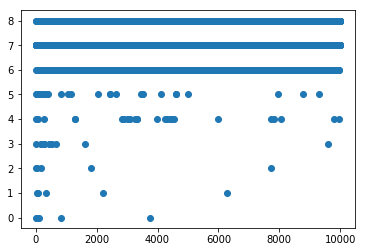

In [5]:
K = len(rewards)
agent = Thompson(K)
simulate(agent)

scatter(range(10000),agent.A)